## FDMS TME2
Florian Toque & Paul Willot


In [1]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn.datasets import fetch_mldata
from sklearn import cross_validation
from sklearn import base
#mnist = fetch_mldata('iris')



In [68]:
mnist = fetch_mldata('iris')

X= mnist.data
y= mnist.target

for idx,i in enumerate(y):
    if (i==2) or (i==3):
        y[idx]=-1

In [92]:
ds = sklearn.datasets.make_classification(n_samples=10000,
                                          n_features=30,
                                          n_informative=15,
                                          n_redundant=0,
                                          n_repeated=0,
                                          n_classes=2,
                                          n_clusters_per_class=2,
                                          weights=None,
                                          flip_y=0.01,
                                          class_sep=1.0,
                                          hypercube=True,
                                          shift=0.0,
                                          scale=1.0,
                                          shuffle=True,
                                          random_state=None)
X= ds[0]
y= ds[1]

In [93]:
# labels: [0,1] -> [-1,1]
for idx,i in enumerate(y):
    if (i==0):
        y[idx]=-1

print(X[0])
print(y[0])

[ 0.77441749  1.2100455   0.34833233 -0.50007107  1.8198025   0.06550759
 -0.17618814 -1.52874535  0.91775406 -1.44186626  0.17892085  0.07397179
  1.76092023  0.70374516 -0.98012277  1.23666863 -0.69059471  1.81688881
 -3.47772957 -0.14336514 -6.38649834  2.96777149  3.73086657  4.44246158
 -0.99695781 -1.65446447 -1.0162887   7.41505326 -0.90714209  2.58201385]
-1


---
### L1

In [284]:
import copy

In [344]:
class GradientDescent(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        #t = copy.deepcopy(theta)
        #self.theta=t
        self.theta=theta
        self.eps=eps
        self.lamb=lamb
        self.tmp=np.zeros(len(theta))

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            #self.theta=self.tmp
            if printevery!=-1 and i%printevery==0:
                pass
                    
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            cost = np.sum(loss ** 2) * (1 / l) + (self.lamb*np.linalg.norm(self.theta))
            #gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))+np.sign(theta)*self.lamb
            #thetaprime = self.theta - self.eps * gradient
            gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))
            thetaprime = self.theta - self.eps * gradient
            thetaprime = self.theta - self.eps * np.sign(theta)*self.lamb
            #if i%(nbIt/100)==0:
            #    thetaprime = self.theta - self.eps * (np.sign(theta)*self.lamb)
            #else:
            #    thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(self.theta)):
                self.theta[k] = 0 if thetaprime[k]*self.theta[k]<0 else thetaprime[k]   

            self.tmp=self.theta
            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f | Score: %.03f" % (str(i).ljust(6), cost,self.score(X,y)))
                    print("%d features used"%(self.nb_used_features()))
                
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        #print(cpt,len(X))
        return cpt/len(X)
    
    def nb_used_features(self):
        cpt=len(self.tmp)
        for ii in self.tmp:
            if ii==0:
                cpt-=1
        return cpt

In [348]:
#theta = np.zeros(len(X[0]))
theta = X[0]
lamb=0.4
eps=0.00001

#gd = SimpleGradientDescent(theta,eps)
gd = GradientDescent(theta,lamb,eps)

In [349]:
nbIterations = 2000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)
print(gd.tmp)
print(gd.nb_used_features())

Iteration 0      | Cost: 0.091684 | Score: 0.761
22 features used
Iteration 200    | Cost: 0.090613 | Score: 0.762
21 features used
Iteration 400    | Cost: 0.089553 | Score: 0.762
19 features used
Iteration 600    | Cost: 0.088503 | Score: 0.760
18 features used
Iteration 800    | Cost: 0.087461 | Score: 0.760
17 features used
Iteration 1000   | Cost: 0.086427 | Score: 0.761
17 features used
Iteration 1200   | Cost: 0.085401 | Score: 0.761
16 features used
Iteration 1400   | Cost: 0.084382 | Score: 0.761
16 features used
Iteration 1600   | Cost: 0.083370 | Score: 0.761
16 features used
Iteration 1800   | Cost: 0.082366 | Score: 0.761
16 features used
[ 0.          0.         -0.07647754  0.         -0.08255983  0.          0.
  0.          0.          0.          0.          0.          0.
  0.10019027  0.          0.          0.         -0.01650632 -0.02124793
  0.         -0.04467159  0.01655069 -0.04816544 -0.03789455  0.
  0.03762319 -0.00495664 -0.04034841 -0.09345555 -0.01122418

In [350]:
gd.score(X,y)

0.7604

In [351]:
scoresGrad = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scoresGrad,np.mean(scoresGrad)))

Cross validation scores: [ 0.759   0.7635  0.7515  0.757   0.767 ], mean: 0.76


In [354]:
eps=0.00001
la = []
cross_sc = []
used_features = []

for lamb in np.arange(0,1.1,0.1):
    theta = X[0]
    gd = GradientDescent(theta,lamb,eps)
    nbIterations = 1000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %.02f | Cross val mean: %.02f | Features: %d"%(lamb,np.mean(scoresSvm),gd.nb_used_features()))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)
    used_features.append(gd.nb_used_features())

Lamda: 0.00 | Cross val mean: 0.50 | Features: 0
Lamda: 0.10 | Cross val mean: 0.50 | Features: 0


KeyboardInterrupt: 

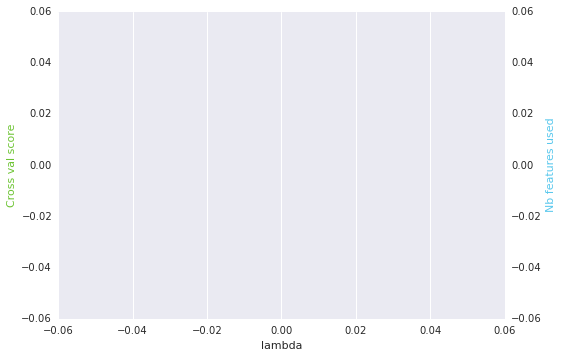

In [209]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(la, cross_sc, '#6DC433')
ax2.plot(la, used_features, '#5AC8ED')

ax1.set_xlabel('lambda')
ax1.set_ylabel('Cross val score', color='#6DC433')
ax2.set_ylabel('Nb features used', color='#5AC8ED')

ax1.yaxis.grid(False)
ax2.grid(False)
plt.show()

---
### L2

In [12]:
class GradientDescentL2(base.BaseEstimator):
    def __init__(self,theta,lamb,eps):
        self.theta=theta
        self.eps=eps
        self.lamb=lamb

    def fit(self,X,y,nbIt=1000,printevery=-1):
        l=len(X)
        xTrans = X.transpose()
        
        for i in xrange(0,nbIt):
            index = np.random.randint(l)
            loss = np.dot(X, self.theta) - y
            cost = np.sum(loss ** 2) / (2 * l) + (self.lamb*(np.linalg.norm(-self.theta)**2))
            gradient = np.dot(xTrans,(np.dot(theta,xTrans)-y))+np.sign(theta)*self.lamb
            thetaprime = self.theta - self.eps * gradient
            
            for k in xrange(0,len(theta)):
                theta[k] = 0 if thetaprime[k]*theta[k]<0 else thetaprime[k]

            if printevery!=-1 and i%printevery==0:
                    print("Iteration %s | Cost: %f" % (str(i).ljust(6), cost))
                
    def predict(self,x):
        #print("Product: %f"%(np.dot(x,self.theta)))
        ret=[]
        for i in x:
            ret.append(1 if np.dot(i,self.theta)>0 else -1)
        return ret
    
    def score(self,X,y):
        cpt=0.0
        allpred = self.predict(X)
        for idx,i in enumerate(allpred):
            cpt += 1 if i==y[idx] else 0
        print(cpt,len(X))
        return cpt/len(X)

In [13]:
theta = np.zeros(len(X[0]))
lamb=0.05
eps=0.00001
gd = GradientDescentL2(theta,lamb,eps)

nbIterations = 20000
gd.fit(X,y,nbIterations,printevery=nbIterations/10)

print("Score: %s"%gd.score(X,y))

scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
print("Cross validation scores: %s, mean: %.02f"%(scoresSvm,np.mean(scoresSvm)))

Iteration 0      | Cost: 0.500000
Iteration 2000   | Cost: 0.190335
Iteration 4000   | Cost: 0.189843
Iteration 6000   | Cost: 0.190266
Iteration 8000   | Cost: 0.190468
Iteration 10000  | Cost: 0.190555
Iteration 12000  | Cost: 0.190593
Iteration 14000  | Cost: 0.190609
Iteration 16000  | Cost: 0.190617
Iteration 18000  | Cost: 0.190620
(93.0, 100)
Score: 0.93
Cross validation scores: [ 1.    0.85  0.95  0.9   0.95], mean: 0.93


In [14]:
eps=0.00001
la = []
cross_sc = []

for lamb in np.arange(0,12,0.5):
    theta = np.zeros(len(X[0]))
    gd = GradientDescentL2(theta,lamb,eps)
    nbIterations = 5000
    gd.fit(X,y,nbIterations)
    scoresSvm = cross_validation.cross_val_score(gd, X, y, cv=5,scoring="accuracy")
    print("Lamda: %.02f, Cross val mean: %.02f"%(lamb,np.mean(scoresSvm)))
    cross_sc.append(np.mean(scoresSvm))
    la.append(lamb)

Lamda: 0.00, Cross val mean: 0.93
Lamda: 0.50, Cross val mean: 0.93
Lamda: 1.00, Cross val mean: 0.92
Lamda: 1.50, Cross val mean: 0.91
Lamda: 2.00, Cross val mean: 0.90
Lamda: 2.50, Cross val mean: 0.89
Lamda: 3.00, Cross val mean: 0.89
Lamda: 3.50, Cross val mean: 0.89
Lamda: 4.00, Cross val mean: 0.89
Lamda: 4.50, Cross val mean: 0.89
Lamda: 5.00, Cross val mean: 0.88
Lamda: 5.50, Cross val mean: 0.88
Lamda: 6.00, Cross val mean: 0.87
Lamda: 6.50, Cross val mean: 0.86
Lamda: 7.00, Cross val mean: 0.85
Lamda: 7.50, Cross val mean: 0.85
Lamda: 8.00, Cross val mean: 0.86
Lamda: 8.50, Cross val mean: 0.86
Lamda: 9.00, Cross val mean: 0.86
Lamda: 9.50, Cross val mean: 0.86
Lamda: 10.00, Cross val mean: 0.86
Lamda: 10.50, Cross val mean: 0.86
Lamda: 11.00, Cross val mean: 0.85
Lamda: 11.50, Cross val mean: 0.85


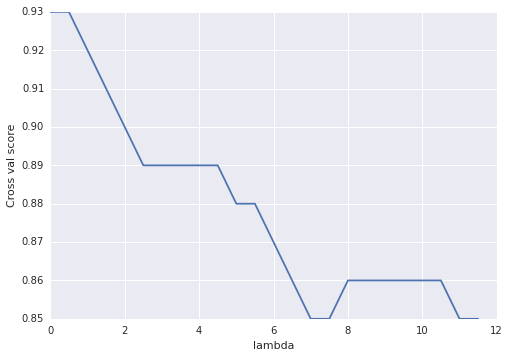

In [15]:
import matplotlib.pyplot as plt
plt.plot(la,cross_sc)
plt.ylabel('Cross val score')
plt.xlabel('lambda')
plt.show()